Techniques/questions to look at with this particular exmaple:

+ How to merge datasets and different merge techniques
+ List of movies that are rated most by users
+ In ratings, how to address ratings sparsity problem
+ Plot distributions
+ Identify different age groups and technique of binning
+ Subgrouping and unstacking
+ Differences in ratings by gender

In [2]:
import pandas as pd
import numpy as np

In [3]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('/Users/vikrantdhawan/Dropbox/My Mac (Vikrant’s MacBook Air)/Downloads/python/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('/Users/vikrantdhawan/Dropbox/My Mac (Vikrant’s MacBook Air)/Downloads/python/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('/Users/vikrantdhawan/Dropbox/My Mac (Vikrant’s MacBook Air)/Downloads/python/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')


In [4]:
print(users.shape)
print(ratings.shape)
print(movies.shape)
users.describe()
users.columns

(943, 5)
(100000, 4)
(1682, 5)


Index(['user_id', 'age', 'sex', 'occupation', 'zip_code'], dtype='object')

In [5]:
print(len(pd.unique(users['user_id'])))
print(len(pd.unique(ratings['user_id'])))

print(len(pd.unique(ratings['movie_id'])))
print(len(pd.unique(movies['movie_id'])))

943
943
1682
1682


In [6]:
users.head(10)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [31]:
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [6]:
users.describe()
users[users.age<15].age.value_counts()

13    5
14    3
7     1
10    1
11    1
Name: age, dtype: int64

In [12]:
ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [35]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [37]:
movies.dtypes 

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [14]:
#Selecting a subset of columns
movies[['movie_id','title']].head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [39]:
#Another example of subsetting
users[users.age<40].tail(10)

,user_id,age,sex,occupation,zip_code
926,927,23,M,programmer,55428
927,928,21,M,student,55408
929,930,28,F,scientist,07310
932,933,28,M,student,48105
935,936,24,M,other,32789
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
942,943,22,M,student,77841


In [18]:
users[(users.age < 40) & (users.sex == 'F')].count()

user_id       183
age           183
sex           183
occupation    183
zip_code      183
dtype: int64

In [10]:
a = users.groupby(["sex","occupation"]).count().unstack(0)
a
a["user_id"]["F"]["artist"]

13.0

In [11]:
#print(users['sex'].groupby(users.occupation).count())
#print(users['sex'].groupby(users.occupation).min())# not a single female dotor
print(users['sex'].groupby([users.occupation,users.sex]).count().unstack(1))
print(sum(users['sex'].groupby([users.occupation,users.sex]).count()))

sex               F      M
occupation                
administrator  36.0   43.0
artist         13.0   15.0
doctor          NaN    7.0
educator       26.0   69.0
engineer        2.0   65.0
entertainment   2.0   16.0
executive       3.0   29.0
healthcare     11.0    5.0
homemaker       6.0    1.0
lawyer          2.0   10.0
librarian      29.0   22.0
marketing      10.0   16.0
none            4.0    5.0
other          36.0   69.0
programmer      6.0   60.0
retired         1.0   13.0
salesman        3.0    9.0
scientist       3.0   28.0
student        60.0  136.0
technician      1.0   26.0
writer         19.0   26.0
943


In [77]:
movies.head(2)

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...


In [40]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [41]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [13]:
#Merge datasets
movie_ratings = pd.merge(movies, ratings, how="left",on="movie_id")
lens = pd.merge(movie_ratings, users,how="left",on="user_id")
#merge on common col names

In [45]:
lens.shape

(100000, 12)

In [14]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,21,M,salesman,31211
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,33,M,engineer,97006
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,30,F,librarian,22903
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,23,M,student,80521


In [15]:
#my
lens['title'].groupby(lens.title).count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

In [16]:
#Let us answer some simple questions now. 
#Most rated movies
most_rated = lens.groupby('title').size().sort_values(ascending=False)
most_rated.head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
dtype: int64

In [50]:
lens.title.value_counts().head(5)

Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: title, dtype: int64

In [17]:
#my

HR1 = lens['rating'].groupby(lens['title']).mean().sort_values(ascending=False)
print(HR1.head(10))

HR2 = lens['rating'].groupby(lens['title']).median().sort_values(ascending=False)
print(HR2.head(10))

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64
title
Paradise Lost: The Child Murders at Robin Hood Hills (1996)    5.0
Star Kid (1997)                                                5.0
Close Shave, A (1995)                                          5.0
Citizen Kane (1941)                                            5.0
Prefontaine (1997)                                             5.0
Wallace & Gromit: The Best of Aardman Animation (1996)

In [25]:
#Highest rated movies

highest_ratings = lens.groupby('title').agg({'rating':[np.size,np.mean]})
highest_ratings.head(10)
highest_ratings['rating'][['size','mean']].sort_values("mean",ascending=False)

,size,mean
title,,
They Made Me a Criminal (1939),1,5.0
Marlene Dietrich: Shadow and Light (1996),1,5.0
"Saint of Fort Washington, The (1993)",2,5.0
Someone Else's America (1995),1,5.0
Star Kid (1997),3,5.0
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1,1.0
King of New York (1990),1,1.0
Touki Bouki (Journey of the Hyena) (1973),1,1.0


In [83]:
highest_ratings.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [68]:
atleast_100 = highest_ratings['rating']['size'] >= 200
highest_ratings[atleast_100].sort_values([('rating', 'mean')], ascending=False)

rating          
                                   size      mean
title                                            
Schindler's List (1993)             298  4.466443
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
...                                 ...       ...
Broken Arrow (1996)                 254  3.031496
Evita (1996)                        259  2.980695
Dante's Peak (1997)                 240  2.933333
Mars Attacks! (1996)                217  2.847926
Volcano (1997)                      219  2.808219

[118 rows x 2 columns]

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

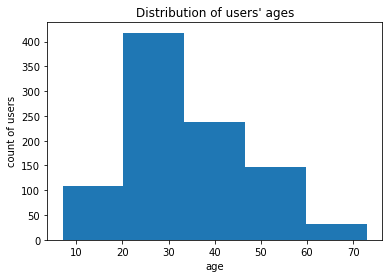

In [87]:
plt.hist(users.age,bins=5)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [69]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens['age_group'].head(10)
lens.age_group.value_counts()

20-29    39535
30-39    25696
40-49    15021
50-59     8704
10-19     8181
60-69     2623
70-79      197
0-9         43
Name: age_group, dtype: int64

In [106]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})


rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [26]:
most_100 = lens.groupby('movie_id').size().sort_values(ascending=False).head(100)
most_100

,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
movie_id,,,,,,,,,,,
1,452,452,0,452,452,452,452,452,452,452,452
2,131,131,0,131,131,131,131,131,131,131,131
3,90,90,0,90,90,90,90,90,90,90,90
4,209,209,0,209,209,209,209,209,209,209,209
5,86,86,0,86,86,86,86,86,86,86,86
...,...,...,...,...,...,...,...,...,...,...,...
96,295,295,0,295,295,295,295,295,295,295,295
97,256,256,0,256,256,256,256,256,256,256,256
98,390,390,0,390,390,390,390,390,390,390,390


In [27]:
lens.set_index('movie_id', inplace=True)
lens

,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
movie_id,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088,21,M,salesman,31211
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411,33,M,engineer,97006
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,891700426,30,F,librarian,22903
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,883601324,23,M,student,80521
...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,863,1,889289570,17,M,student,60089
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,863,3,889289491,17,M,student,60089
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),863,2,889289570,17,M,student,60089


In [81]:
by_age = lens.loc[most_100.index].groupby(['title', 'age_group'])
by_age.rating.mean()["Toy Story (1995)"]


age_group
0-9           NaN
10-19    3.621622
20-29    3.920635
30-39    4.033058
40-49    3.700000
50-59    3.758621
60-69    3.400000
70-79    5.000000
Name: rating, dtype: float64

In [94]:
lens.head(10)
lens[['rating','age_group','title']].groupby(['age_group','title']).mean().unstack(0)

rating                                \
age_group                                0-9     10-19     20-29     30-39   
title                                                                        
'Til There Was You (1997)                NaN  1.000000  2.285714  4.000000   
1-900 (1994)                             NaN       NaN  1.000000  3.666667   
101 Dalmatians (1996)                    NaN  3.545455  2.648649  3.088235   
12 Angry Men (1957)                      NaN  4.500000  4.230769  4.382353   
187 (1997)                               NaN  3.333333  3.222222  2.200000   
...                                      ...       ...       ...       ...   
Young Guns II (1990)                     NaN  3.428571  2.857143  2.000000   
Young Poisoner's Handbook, The (1995)    NaN  4.000000  3.600000  2.800000   
Zeus and Roxanne (1997)                  NaN       NaN  3.000000  1.000000   
unknown                                  NaN       NaN  3.666667  3.000000   
Á köldum klaka (Cold Fever) (1994)       NaN       NaN       NaN       NaN   

                                                                       
age_group                                 40-49     50-59 60-69 70-79  
title                                                                  
'Til There Was You (1997)                   NaN       NaN   NaN   NaN  
1-900 (1994)                                NaN       NaN   NaN   NaN  
101 Dalmatians (1996)                  2.950000  2.333333   2.0   NaN  
12 Angry Men (1957)                    4.500000  4.235294   4.4   NaN  
187 (1997)                             2.500000  3.333333   NaN   NaN  
...                                         ...       ...   ...   ...  
Young Guns II (1990)                   2.000000       NaN   NaN   NaN  
Young Poisoner's Handbook, The (1995)  2.333333  3.750000   3.0   NaN  
Zeus and Roxanne (1997)                2.333333  2.000000   NaN   NaN  
unknown                                     NaN       NaN   NaN   NaN  
Á köldum klaka (Cold Fever) (1994)          NaN  3.000000   NaN   NaN  

[1664 rows x 8 columns]

In [113]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]


age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
"Birdcage, The (1996)",0.0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.0
Blade Runner (1982),0.0,3.400000,4.134454,4.211765,4.147059,4.136364,4.400000,0.0
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.0
Brother Minister: The Assassination of Malcolm X (1994),0.0,0.000000,3.333333,0.000000,2.500000,0.000000,0.000000,0.0
"Brothers McMullen, The (1995)",0.0,3.750000,3.529412,3.333333,3.375000,3.000000,4.500000,3.0
Carlito's Way (1993),0.0,4.500000,3.538462,3.200000,3.750000,3.000000,2.000000,0.0
Clerks (1994),0.0,4.727273,3.825000,3.750000,3.250000,3.333333,4.333333,3.0
Copycat (1995),0.0,3.400000,3.243243,3.333333,3.285714,3.333333,3.500000,0.0
Crimson Tide (1995),0.0,3.833333,3.492537,3.708333,3.750000,3.900000,3.400000,0.0


In [114]:
lens.reset_index('movie_id', inplace=True)


In [116]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [97]:
pivoted2 = lens.pivot_table(index=['age_group'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted2.head(20)

sex,F,M
age_group,,
0-9,0.000000,3.767442
10-19,3.552344,3.455969
20-29,3.420305,3.482504
30-39,3.672275,3.511744
40-49,3.548917,3.608410
50-59,3.535937,3.673972
60-69,3.260870,3.652308
70-79,3.239437,3.880952


In [95]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

NameError: name 'pivoted' is not defined

<AxesSubplot:xlabel='age_group'>

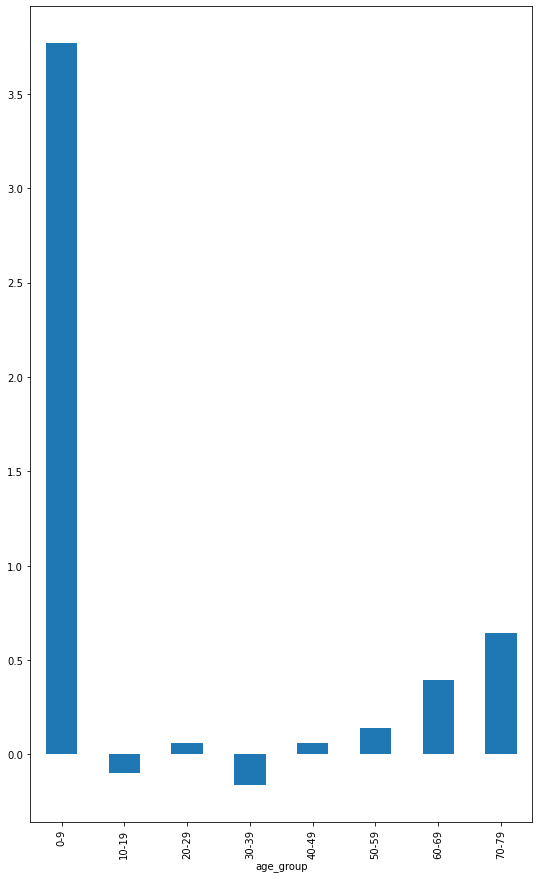

In [103]:
pivoted2['diff'] = pivoted2.M - pivoted2.F
pivoted2

pivoted2['diff'].plot(kind='bar', figsize=[9, 15])

In [115]:
pivoted.reset_index('movie_id', inplace=True)


NameError: name 'pivoted' is not defined

In [148]:
disagreements = pivoted[pivoted.movie_id.isin(most_100.index)]['diff']
disagreements.head()

title
Toy Story (1995)     0.119994
GoldenEye (1995)    -0.189850
Four Rooms (1995)    0.420608
Get Shorty (1995)    0.191463
Copycat (1995)      -0.632102
Name: diff, dtype: float64

In [149]:
disagreements.describe()

count    100.000000
mean      -0.015862
std        0.447895
min       -2.333333
25%       -0.178594
50%       -0.013110
75%        0.198015
max        1.428571
Name: diff, dtype: float64

In [150]:
disagree = disagreements.copy()
disagree=disagree.sort_values()
disagree.head()

title
Faster Pussycat! Kill! Kill! (1965)                       -2.333333
Free Willy 2: The Adventure Home (1995)                   -1.133333
Robert A. Heinlein's The Puppet Masters (1994)            -0.964286
Free Willy (1993)                                         -0.818182
To Wong Foo, Thanks for Everything! Julie Newmar (1995)   -0.778378
Name: diff, dtype: float64

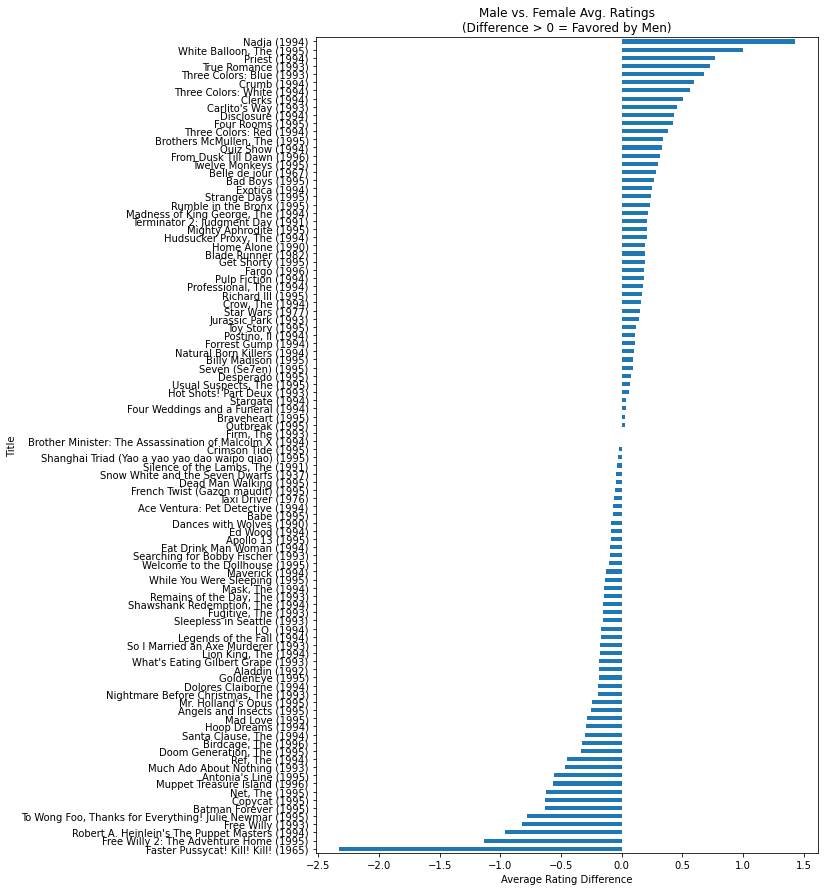

In [151]:
disagree.plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');